# **5주차 실습 - 이상값, dplyr**

- - -

* **실습관련 질문 : jjbblue12@hallym.ac.kr (전준범 조교 공학관 1314호 데이터베이스 연구실
)**

* 실습 영상은 Google Colaboratory을 이용하여 진행.
  
  - notebook 파일 제공 예정

**<5주차 실습 내용>**
* 이상값

* dplyr






# 이상값

* 데이터에는 논리적 또는 통계학적으로 이상한 데이터가 들어가 있을 수 있다.(Wikipedia에서 이상값 정의 : 다른 관측값과 멀리 떨어진 관측값)

* 측정값의 변동이 큰 경우나 실험적 오류 등으로 인해 발생

* 이상값은 통계 분석에서 심각한 문제를 일으킬 수 있는 요소가 된다

# 이상값 처리

* 실제 상황에서는 이상값을 정의하기가 모호한 경우가 많다.

* 예를 들어 어떤 사람의 나이가 120살 이라고 입력이 되어 있다면, 이것은 이상값이라 할지 정상값이라 할지 명확히 판단하기 어렵다.

* 따라서 이상값을 정의하기가 모호하다면, 사분위수(quartiles)와 boxplot을 이용해서 이상값을 추론한다.

In [ ]:
install.packages("data.table")
install.packages("tidyverse")

library(data.table)
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()



In [124]:
# 모든 열의 4분위수 구하기!!!!
summary(airquality)

quar <- summary(airquality)
str(quar)

     Ozone           Solar.R           Wind             Temp      
 Min.   :  1.00   Min.   :  7.0   Min.   : 1.700   Min.   :56.00  
 1st Qu.: 18.00   1st Qu.:115.8   1st Qu.: 7.400   1st Qu.:72.00  
 Median : 31.50   Median :205.0   Median : 9.700   Median :79.00  
 Mean   : 42.13   Mean   :185.9   Mean   : 9.958   Mean   :77.88  
 3rd Qu.: 63.25   3rd Qu.:258.8   3rd Qu.:11.500   3rd Qu.:85.00  
 Max.   :168.00   Max.   :334.0   Max.   :20.700   Max.   :97.00  
 NA's   :37       NA's   :7                                       
     Month            Day      
 Min.   :5.000   Min.   : 1.0  
 1st Qu.:6.000   1st Qu.: 8.0  
 Median :7.000   Median :16.0  
 Mean   :6.993   Mean   :15.8  
 3rd Qu.:8.000   3rd Qu.:23.0  
 Max.   :9.000   Max.   :31.0  
                               

 'table' chr [1:7, 1:6] "Min.   :  1.00  " "1st Qu.: 18.00  " ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:7] "" "" "" "" ...
  ..$ : chr [1:6] "    Ozone" "   Solar.R" "     Wind" "     Temp" ...


In [ ]:
quar[, 1] # 첫 번째 열, Ozone

"Min.   :  1.00  " "1st Qu.: 18.00  " "Median : 31.50  " "Mean   : 42.13  " 
                                                         
"3rd Qu.: 63.25  " "Max.   :168.00  "     "NA's   :37  "

[,1] 
[1,]   1.0
[2,]  18.0
[3,]  31.5
[4,]  63.5
[5,] 122.0

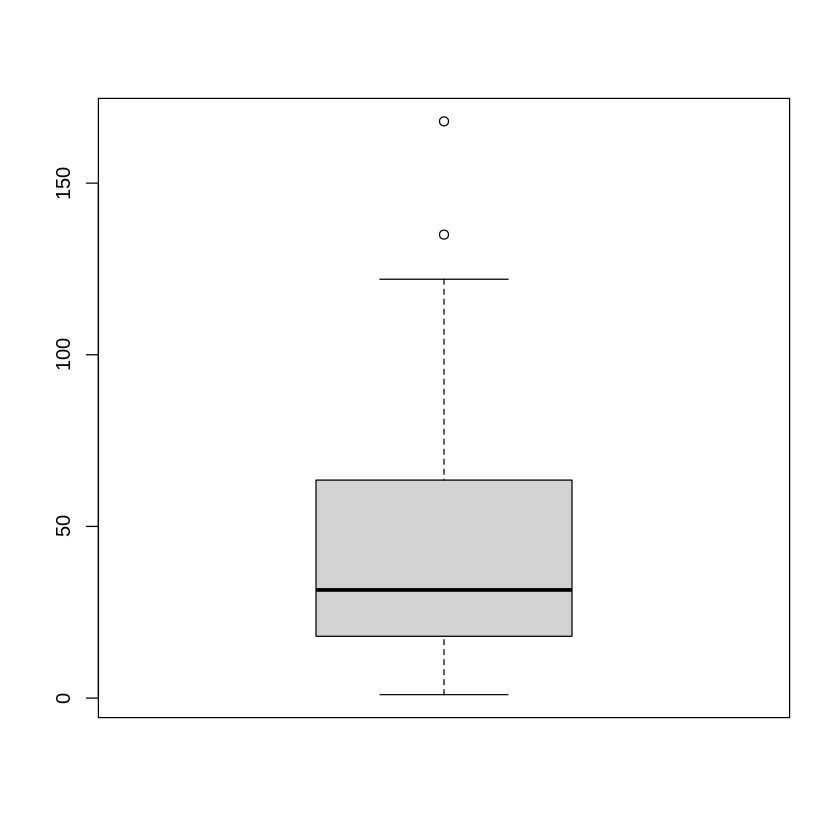

In [125]:
# 또한, boxplot으로 그래프와 수치까지 확인할 수 있다
boxplot(airquality$Ozone)$stats ## 1개만 그린다면


[,1]  [,2] [,3] [,4]
[1,]   1.0   7   1.7 56  
[2,]  18.0 115   7.4 72  
[3,]  31.5 205   9.7 79  
[4,]  63.5 259  11.5 85  
[5,] 122.0 334  16.6 97

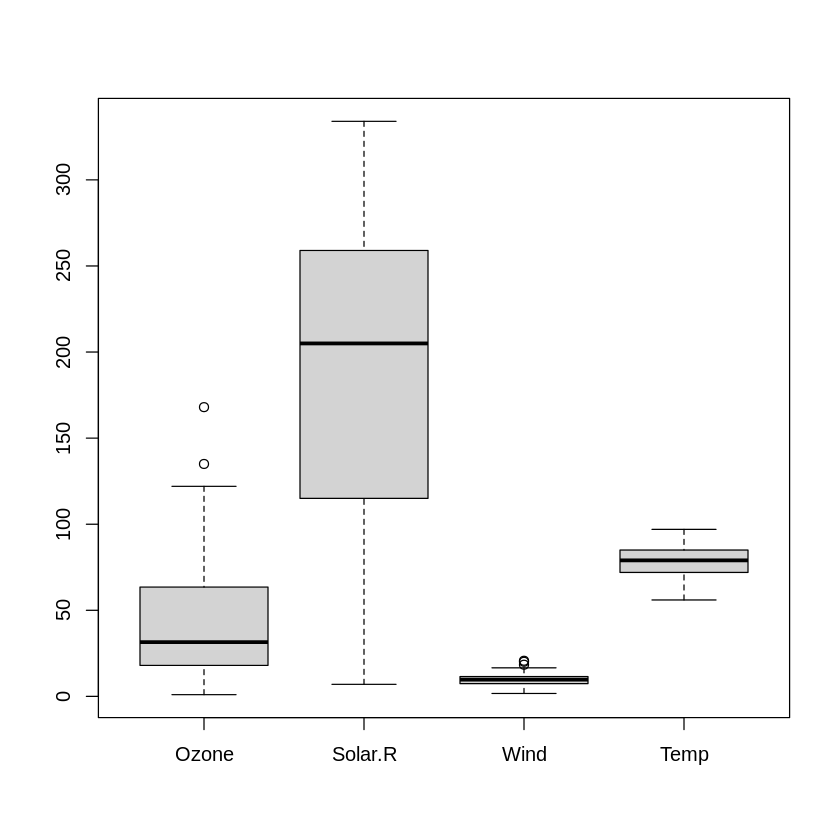

In [126]:
boxplot(airquality[, c(1:4)])$stats

In [127]:
##실습 데이터를 가지고 확인해보자!
DF <- read.table(file = "Pre_Season_Batter.csv", sep = ",", header = TRUE)
summary(DF)

   batter_id     batter_name             year          team          
 Min.   :  0.0   Length:1393        Min.   :2002   Length:1393       
 1st Qu.: 99.0   Class :character   1st Qu.:2010   Class :character  
 Median :178.0   Mode  :character   Median :2014   Mode  :character  
 Mean   :173.4                      Mean   :2013                     
 3rd Qu.:254.0                      3rd Qu.:2017                     
 Max.   :344.0                      Max.   :2018                     
                                                                     
     avg                  G                 AB              R        
 Length:1393        Min.   :  1.000   Min.   :  0.0   Min.   : 0.00  
 Class :character   1st Qu.:  6.000   1st Qu.:  9.0   1st Qu.: 1.00  
 Mode  :character   Median :  9.000   Median : 18.0   Median : 2.00  
                    Mean   :  8.706   Mean   : 19.2   Mean   : 2.68  
                    3rd Qu.: 11.000   3rd Qu.: 28.0   3rd Qu.: 4.00  
                    

[,1]  
[1,] 0.0000
[2,] 0.2170
[3,] 0.3445
[4,] 0.4780
[5,] 0.8640

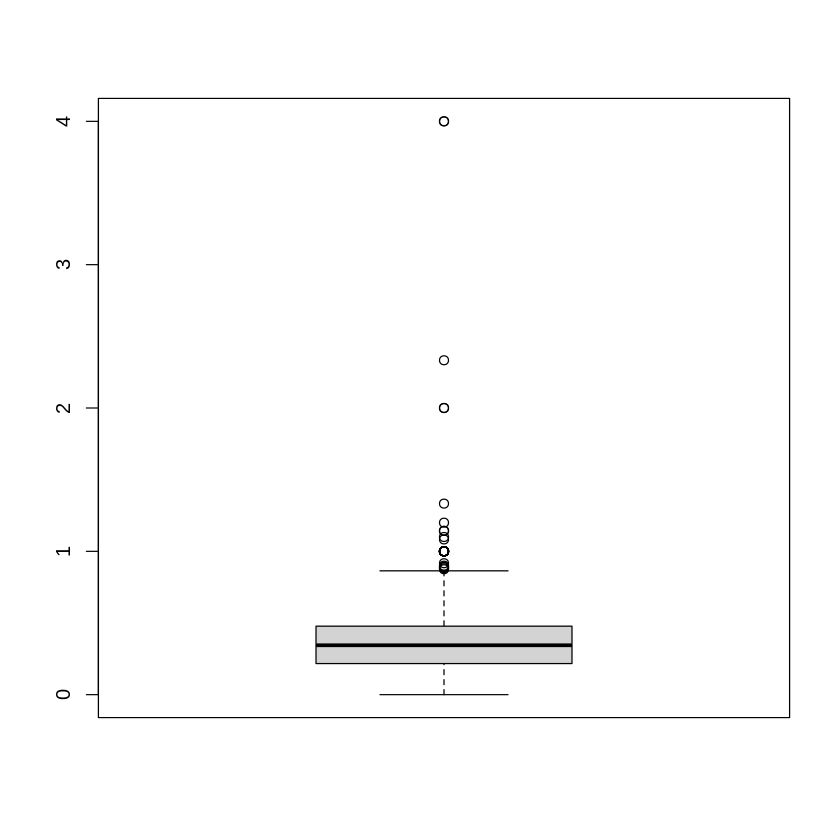

[,1] 
[1,] 0.063
[2,] 0.250
[3,] 0.333
[4,] 0.400
[5,] 0.625

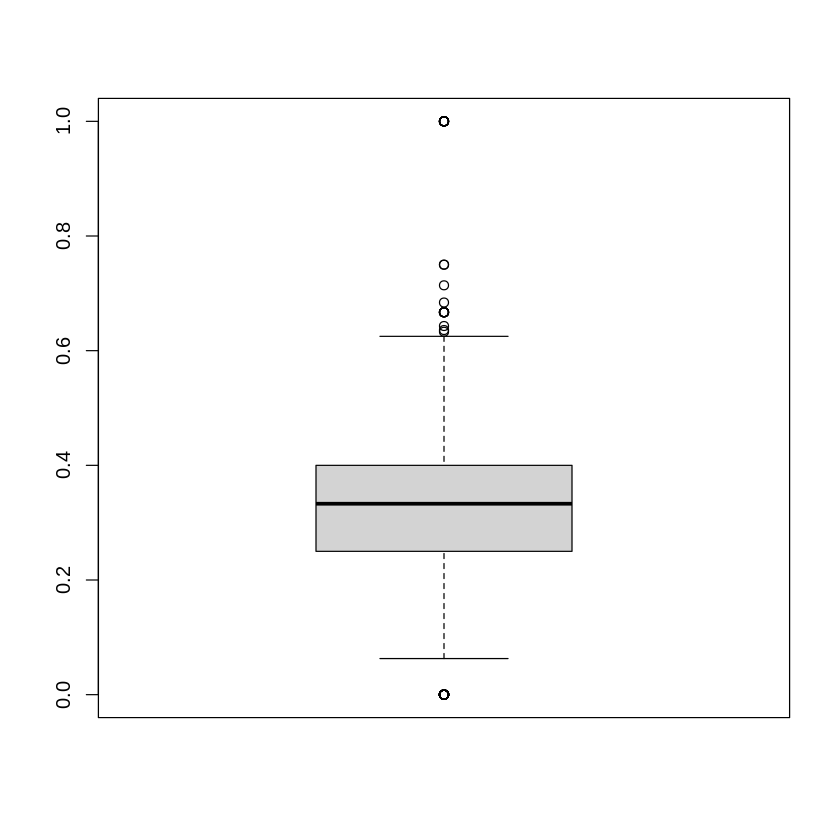

In [128]:
boxplot(DF$SLG)$stats 
boxplot(DF$OBP)$stats 

In [129]:
boxplot(DF[, 6:14])$stats

[,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9]
[1,]  1    0   0     0   0    0    0     0    0  
[2,]  6    9   1     2   0    0    0     2    0  
[3,]  9   18   2     4   1    0    0     6    2  
[4,] 11   28   4     8   2    0    1    11    4  
[5,] 17   56   8    17   5    0    2    24   10

In [ ]:
## 모든 열의 IQR구하기!!
## IQR = Q3 - Q1
## 하지만 우리는 이미 존재하는 함수, IQR를 이용한다

IQRs <- function(DF){
  iqrs <- lapply(X = DF, function(col){
    return_value <- NULL
    if(class(col) != 'character'){
      return_value <- IQR(col, na.rm = T)
    } else {
      return_value <- -999
    }
    return(return_value)
  })
  return(iqrs)
}


What is lower and upper fence?

The Lower fence is the "lower limit" and the Upper fence is the "upper limit" of data, and any data lying outside this defined bounds can be considered an outlier.

1. LF = Q1 - 1.5 * IQR
2. UF = Q3 + 1.5 * IQR

In [ ]:
IQRs(DF) %>% bind_cols()

batter_id batter_name year team avg  G AB R H X2B ⋯ GDP SLG   OBP  E
1 155       -999        7    -999 -999 5 19 3 6 2   ⋯ 1   0.261 0.15 1
  height.weight year_born position career starting_salary OPS  
1 -999          -999      -999     -999   -999            0.395

# dplyr library

# 1. dplyr - select, filter, groupby, summarize, %>%

* dplyr 패키지는 Hadley Wickham가 작성한 데이터 처리에 특화된 R 패키지입니다. 이 분이 지금까지 작성한 유명한 R 패키지로는 ggplot2, plyr, reshape2등이 있으며 이미 많은 분들이 사용하고 있으리라 생각합니다.

* 데이터 처리에 특화된 유용한 패키지로는 역시 Hadley Wickham이 만든 plyr이라는 패키지가 있었습니다. 그러나 plyr은 편리하긴 했지만 모든 함수가 R로 작성되어서 처리 속도가 느리다는 단점이 있었습니다. 이에 반해 dplyr은 C++로 작성되어 불필요한 함수를 불러오지 않기 때문에 매우 빠른 처리 속도를 자랑합니다.

* dplyr 패키지는 데이터 프레임을 처리하는 함수군으로 구성되어 있습니다. 하지만 그 밖에도 다음 형식의 데이터를 이용할 수 있습니다.

    * data.table : data.table 패키지와 사용
    * 각종 데이터베이스 : 현재 MySQL, PostgreSQL, SQLite, BigQuery를 지원
    * 데이터 큐브 : dplyr 패키지 내부에 실험적으로 내장됨

In [ ]:
library(dplyr) # or library(tidyverse)
library(data.table)

[1] 1364

In [130]:
# 실습 데이터 로드!!
DF <- fread("/content/Pre_Season_Batter.csv", header = T, encoding = "UTF-8") %>% as_tibble()

# DF <- as_tibble(DF)를 %>%으로 간소화

In [131]:
DF %>% show() # Rstudio에서는 tibble 변수(DF)만 입력해도 됨.

# A tibble: 1,393 × 29
   batter_id batter_name  year team  avg       G    AB     R     H  `2B`  `3B`
       <int> <chr>       <int> <chr> <chr> <int> <int> <int> <int> <int> <int>
 1         0 가르시아     2018 LG    0.350     7    20     1     7     1     0
 2         1 강경학       2011 한화  0.000     4     2     2     0     0     0
 3         1 강경학       2014 한화  -         4     0     2     0     0     0
 4         1 강경학       2015 한화  0.130    10    23     3     3     0     0
 5         1 강경학       2016 한화  0.188    14    32     4     6     1     1
 6         1 강경학       2017 한화  0.222    11    36    10     8     0     0
 7         2 강구성       2013 NC    0.000     3     4     0     0     0     0
 8         2 강구성       2016 NC    0.000     3     1     0     0     0     0
 9         2 강구성       2017 NC    1.000     2     1     0     1     0     0
10        69 김태완       2006 한화  0.200    10    15     0     3     0     0
# … with 1,383 more rows, and 18 more variables: HR <int>, TB <int>, RBI

# * Select

In [ ]:
# base R
DF[, c("batter_name", "team")] %>% show()

# A tibble: 1,393 × 2
   batter_name team 
   <chr>       <chr>
 1 가르시아    LG   
 2 강경학      한화 
 3 강경학      한화 
 4 강경학      한화 
 5 강경학      한화 
 6 강경학      한화 
 7 강구성      NC   
 8 강구성      NC   
 9 강구성      NC   
10 김태완      한화 
# … with 1,383 more rows


In [133]:
# dplyr
DF %>% select(., batter_name, team) %>% show()

# A tibble: 1,393 × 2
   batter_name team 
   <chr>       <chr>
 1 가르시아    LG   
 2 강경학      한화 
 3 강경학      한화 
 4 강경학      한화 
 5 강경학      한화 
 6 강경학      한화 
 7 강구성      NC   
 8 강구성      NC   
 9 강구성      NC   
10 김태완      한화 
# … with 1,383 more rows


In [134]:
DF %>% select(., -batter_name, -team) %>% show()

# A tibble: 1,393 × 27
   batter_id  year avg       G    AB     R     H  `2B`  `3B`    HR    TB   RBI
       <int> <int> <chr> <int> <int> <int> <int> <int> <int> <int> <int> <int>
 1         0  2018 0.350     7    20     1     7     1     0     1    11     5
 2         1  2011 0.000     4     2     2     0     0     0     0     0     1
 3         1  2014 -         4     0     2     0     0     0     0     0     0
 4         1  2015 0.130    10    23     3     3     0     0     0     3     1
 5         1  2016 0.188    14    32     4     6     1     1     0     9     2
 6         1  2017 0.222    11    36    10     8     0     0     2    14     4
 7         2  2013 0.000     3     4     0     0     0     0     0     0     0
 8         2  2016 0.000     3     1     0     0     0     0     0     0     0
 9         2  2017 1.000     2     1     0     1     0     0     0     1     0
10        69  2006 0.200    10    15     0     3     0     0     0     3     3
# … with 1,383 more rows, and

In [135]:
DF %>% select(., 이름 = batter_name, 팀 = team) %>% show()

# A tibble: 1,393 × 2
   이름     팀   
   <chr>    <chr>
 1 가르시아 LG   
 2 강경학   한화 
 3 강경학   한화 
 4 강경학   한화 
 5 강경학   한화 
 6 강경학   한화 
 7 강구성   NC   
 8 강구성   NC   
 9 강구성   NC   
10 김태완   한화 
# … with 1,383 more rows


In [136]:
DF %>% select(., batter_name1 = batter_name, batter_name2 = batter_name, batter_name3 = batter_name) %>% show()

# A tibble: 1,393 × 3
   batter_name1 batter_name2 batter_name3
   <chr>        <chr>        <chr>       
 1 가르시아     가르시아     가르시아    
 2 강경학       강경학       강경학      
 3 강경학       강경학       강경학      
 4 강경학       강경학       강경학      
 5 강경학       강경학       강경학      
 6 강경학       강경학       강경학      
 7 강구성       강구성       강구성      
 8 강구성       강구성       강구성      
 9 강구성       강구성       강구성      
10 김태완       김태완       김태완      
# … with 1,383 more rows


# * filter : Extract rows meet logical criteria

In [ ]:
# base R
DF[DF$team == "한화", c("team","batter_name")] %>% show()
DF[DF$team == "한화" & (DF$G >= 5 | DF$AB >= 15), c("team","batter_name", "G", "AB")] %>% unique() %>% show()

# A tibble: 131 × 2
   team  batter_name
   <chr> <chr>      
 1 한화  강경학     
 2 한화  강경학     
 3 한화  강경학     
 4 한화  강경학     
 5 한화  강경학     
 6 한화  김태완     
 7 한화  김태완     
 8 한화  김태완     
 9 한화  김태완     
10 한화  김태완     
# … with 121 more rows
# A tibble: 100 × 4
   team  batter_name     G    AB
   <chr> <chr>       <int> <int>
 1 한화  강경학         10    23
 2 한화  강경학         14    32
 3 한화  강경학         11    36
 4 한화  김태완         10    15
 5 한화  김태완          8    22
 6 한화  김태완         10    24
 7 한화  김태완         10    25
 8 한화  김태완          9    28
 9 한화  김태완         10    16
10 한화  강상원          6     0
# … with 90 more rows


In [138]:
# dplyr
DF %>% filter(., team == "한화" & (G >=5 | AB >= 15)) %>% show()
DF %>% filter(., team == "한화" & (G >=5 | AB >= 15)) %>% select(., team, batter_name, G, AB) %>% unique() %>% show()

# A tibble: 104 × 29
   batter_id batter_name  year team  avg       G    AB     R     H  `2B`  `3B`
       <int> <chr>       <int> <chr> <chr> <int> <int> <int> <int> <int> <int>
 1         1 강경학       2015 한화  0.130    10    23     3     3     0     0
 2         1 강경학       2016 한화  0.188    14    32     4     6     1     1
 3         1 강경학       2017 한화  0.222    11    36    10     8     0     0
 4        69 김태완       2006 한화  0.200    10    15     0     3     0     0
 5        69 김태완       2007 한화  0.318     8    22     4     7     3     0
 6        69 김태완       2008 한화  0.375    10    24     3     9     1     0
 7        69 김태완       2009 한화  0.320    10    25     5     8     3     0
 8        69 김태완       2013 한화  0.250     9    28     3     7     0     0
 9        69 김태완       2014 한화  0.125    10    16     1     2     0     0
10         8 강상원       2016 한화  -         6     0     1     0     0     0
# … with 94 more rows, and 18 more variables: HR <int>, TB <int>, RBI <int>,
#   

# * Groupby, summarise

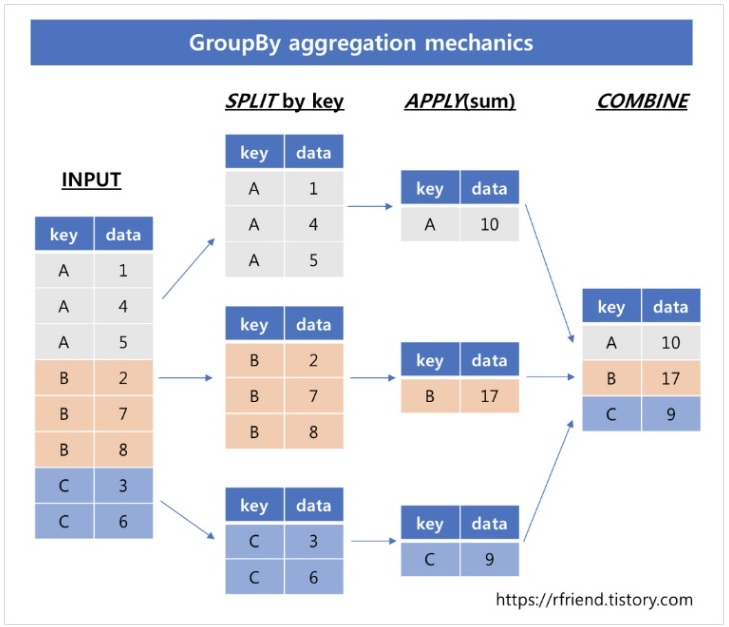

In [139]:
DF %>% group_by(team) %>% show()

# A tibble: 1,393 × 29
# Groups:   team [13]
   batter_id batter_name  year team  avg       G    AB     R     H  `2B`  `3B`
       <int> <chr>       <int> <chr> <chr> <int> <int> <int> <int> <int> <int>
 1         0 가르시아     2018 LG    0.350     7    20     1     7     1     0
 2         1 강경학       2011 한화  0.000     4     2     2     0     0     0
 3         1 강경학       2014 한화  -         4     0     2     0     0     0
 4         1 강경학       2015 한화  0.130    10    23     3     3     0     0
 5         1 강경학       2016 한화  0.188    14    32     4     6     1     1
 6         1 강경학       2017 한화  0.222    11    36    10     8     0     0
 7         2 강구성       2013 NC    0.000     3     4     0     0     0     0
 8         2 강구성       2016 NC    0.000     3     1     0     0     0     0
 9         2 강구성       2017 NC    1.000     2     1     0     1     0     0
10        69 김태완       2006 한화  0.200    10    15     0     3     0     0
# … with 1,383 more rows, and 18 more variables: H

In [140]:
DF %>% group_by(team) %>% summarise(., G_AVG = mean(G), AB_A = mean(AB), R_SUM = sum(R)) %>% show()

# A tibble: 13 × 4
   team     G_AVG  AB_A R_SUM
   <chr>    <dbl> <dbl> <int>
 1 KIA       7.87  16.8   321
 2 KT        7.63  16.3   143
 3 LG        8.74  20.3   500
 4 NC        8.49  17     195
 5 SK        8.37  19.9   426
 6 넥센      9.10  19.0   315
 7 두산     10.7   22.1   601
 8 롯데      8.21  17.7   424
 9 삼성      8.79  20.1   416
10 우리      7.33  17.3    10
11 한화      7.76  18.2   335
12 현대     10.1   25.3    42
13 히어로즈  8.2   15.6     5


In [141]:
DF %>% group_by(team, batter_name) %>% summarise(., G_AVG = mean(G), AB_AVG = mean(AB), R_SUM = sum(R))

`summarise()` has grouped output by 'team'. You can override using the `.groups` argument.



team     batter_name G_AVG     AB_AVG    R_SUM
1   KIA      강한울       7.500000 19.500000  7   
2   KIA      김민식       7.500000 12.000000  3   
3   KIA      김선빈      10.000000 22.333333 29   
4   KIA      김주찬       8.000000 19.000000 15   
5   KIA      김주형       7.727273 17.545455 21   
6   KIA      나지완       9.900000 27.700000 39   
7   KIA      노수광       2.500000  3.000000  0   
8   KIA      박준태      12.000000 18.500000  7   
9   KIA      백용환       6.600000 11.800000  7   
10  KIA      버나디나     6.500000 17.500000  7   
11  KIA      서동욱       6.333333 10.166667  9   
12  KIA      신범수       5.500000  9.500000  2   
13  KIA      신종길       8.833333 21.833333 24   
14  KIA      안치홍       8.375000 24.625000 22   
15  KIA      유민상       2.000000  3.000000  0   
16  KIA      유재신       5.000000  3.000000  2   
17  KIA      윤정우      12.500000 19.000000  8   
18  KIA      이대형      11.000000 28.000000 11   
19  KIA      이명기       7.500000 21.500000  5   
20  KIA      이범호       7.000000 15.500000 12   
21  KIA      이성우       7.571429  9.142857  9   
22  KIA      이영욱       5.000000  7.000000  3   
23  KIA      이용규       7.555556 24.888889 27   
24  KIA      이인행       9.000000 15.000000  2   
25  KIA      이준호       7.000000  7.750000  6   
26  KIA      이호신       9.200000  9.200000 11   
27  KIA      정성훈       8.500000 18.500000  7   
28  KIA      최원준       6.000000 13.000000  5   
29  KIA      최형우       5.500000 14.000000  6   
30  KIA      한승택       5.666667  6.000000  2   
⋮   ⋮        ⋮           ⋮         ⋮         ⋮    
307 한화     오선진       7.000000 12.222222 12   
308 한화     이대수       9.500000 24.500000 14   
309 한화     이동훈       6.666667  4.000000  8   
310 한화     이범호       9.625000 29.000000 38   
311 한화     이성열       8.750000 20.250000 11   
312 한화     이용규       7.500000 22.000000 16   
313 한화     이준수       2.000000  0.500000  0   
314 한화     장민석      12.000000 37.000000 12   
315 한화     장진혁       3.000000  2.000000  0   
316 한화     정경운       6.000000  7.000000  1   
317 한화     정근우       9.000000 28.666667  9   
318 한화     정범모       6.000000  8.000000  4   
319 한화     지성준       8.000000 17.000000  4   
320 한화     최윤석       5.333333  7.666667  3   
321 한화     최재훈       8.000000 15.000000  6   
322 한화     최진행       8.153846 22.230769 28   
323 한화     하주석       6.200000 14.800000  9   
324 한화     한승택      10.000000 15.000000  0   
325 한화     허도환       7.500000 10.000000  3   
326 한화     호잉         6.000000 16.000000  3   
327 현대     유한준      11.000000 26.666667  6   
328 현대     이택근      10.600000 24.400000 11   
329 현대     정성훈      11.600000 38.000000 17   
330 현대     조평호      10.000000 15.000000  0   
331 현대     지석훈       6.750000 12.250000  8   
332 히어로즈 오재일      12.000000 33.000000  1   
333 히어로즈 유재신       8.000000  4.000000  0   
334 히어로즈 이택근       1.000000  3.000000  0   
335 히어로즈 장영석       9.000000  7.000000  0   
336 히어로즈 황재균      11.000000 31.000000  4

# 2. dplyr(arrange,rename,mutate,sample_frac/n)
* arrange
1. 지정한 열을 기준으로 작은 값으로부터 큰 값의 순(오름차순)으로 데이터를 정렬. 역순 정렬(내림차순) desc()

In [ ]:
DF %>% show()

# A tibble: 1,393 × 29
   batter_id batter_name  year team  avg       G    AB     R     H  `2B`  `3B`
       <int> <chr>       <int> <chr> <chr> <int> <int> <int> <int> <int> <int>
 1         0 가르시아     2018 LG    0.350     7    20     1     7     1     0
 2         1 강경학       2011 한화  0.000     4     2     2     0     0     0
 3         1 강경학       2014 한화  -         4     0     2     0     0     0
 4         1 강경학       2015 한화  0.130    10    23     3     3     0     0
 5         1 강경학       2016 한화  0.188    14    32     4     6     1     1
 6         1 강경학       2017 한화  0.222    11    36    10     8     0     0
 7         2 강구성       2013 NC    0.000     3     4     0     0     0     0
 8         2 강구성       2016 NC    0.000     3     1     0     0     0     0
 9         2 강구성       2017 NC    1.000     2     1     0     1     0     0
10        69 김태완       2006 한화  0.200    10    15     0     3     0     0
# … with 1,383 more rows, and 18 more variables: HR <int>, TB <int>, RBI

In [142]:
DF %>% arrange(year)

batter_id batter_name year team avg   G   AB  R  H  2B ⋯ GDP SLG   OBP   E
1     62       김주찬      2002 롯데 0.107  9  28  2   3 0  ⋯ 1   0.107 0.167 1
2     67       김태균      2002 한화 0.235 11  34  7   8 5  ⋯ 0   0.471 0.333 2
3    109       박기혁      2002 롯데 0.000  8   5  1   0 0  ⋯ 0   0.000 0.000 0
4    119       박용택      2002 LG   -      1   0  0   0 0  ⋯ 0      NA    NA 0
5    131       박한이      2002 삼성 0.319 11  47  7  15 3  ⋯ 1   0.447 0.360 0
6    202       이대호      2002 롯데 0.359 11  39  4  14 3  ⋯ 1   0.513 0.375 1
7    207       이범호      2002 한화 0.167  7   6  2   1 1  ⋯ 0   0.333 0.167 0
8    283       조동찬      2002 삼성 0.000  4   1  0   0 0  ⋯ 0   0.000 0.000 0
9    234       이진영      2002 SK   0.297 11  37  5  11 2  ⋯ 0   0.514 0.381 0
10   269       정상호      2002 SK   0.158 13  19  3   3 1  ⋯ 0   0.368 0.304 5
11   270       정성훈      2002 KIA  0.267 12  30  5   8 4  ⋯ 1   0.400 0.258 0
12   319       최형우      2002 삼성 0.000  5   5  1   0 0  ⋯ 0   0.000 0.167 0
13    24       김강민      2003 SK   -      3   0  1   0 0  ⋯ 0      NA    NA 0
14    62       김주찬      2003 롯데 0.175 11  40  8   7 0  ⋯ 0   0.325 0.233 0
15    67       김태균      2003 한화 0.115 10  26  2   3 1  ⋯ 0   0.154 0.303 1
16    83       나주환      2003 두산 0.111 11   9  3   1 0  ⋯ 1   0.111 0.200 0
17   105       박경수      2003 LG   0.067 12  15  1   1 0  ⋯ 0   0.067 0.222 0
18   109       박기혁      2003 롯데 0.190 13  42  2   8 1  ⋯ 1   0.262 0.277 1
19   119       박용택      2003 LG   0.256 13  43  7  11 3  ⋯ 0   0.395 0.313 0
20   131       박한이      2003 삼성 0.212 12  33  3   7 1  ⋯ 0   0.242 0.308 1
21   145       서동욱      2003 KIA  0.300  9  20  2   6 1  ⋯ 0   0.450 0.300 0
22   163       신종길      2003 롯데 0.250  7   8  0   2 1  ⋯ 0   0.375 0.250 0
23   201       이대형      2003 LG   0.167 13   6  4   1 1  ⋯ 0   0.333 0.286 0
24   207       이범호      2003 한화 0.297 13  37  7  11 2  ⋯ 0   0.568 0.438 3
25   211       이성열      2003 LG   0.000  2   1  0   0 0  ⋯ 0   0.000 0.000 0
26   283       조동찬      2003 삼성 0.182  7  11  1   2 1  ⋯ 0   0.545 0.182 1
27   234       이진영      2003 SK   0.171 13  41  3   7 1  ⋯ 1   0.268 0.209 0
28   238       이택근      2003 현대 0.192 12  26  3   5 1  ⋯ 0   0.231 0.276 1
29   269       정상호      2003 SK   0.150 12  20  1   3 0  ⋯ 1   0.150 0.227 2
30   270       정성훈      2003 현대 0.068 13  44  2   3 1  ⋯ 1   0.091 0.146 2
⋮    ⋮         ⋮           ⋮    ⋮    ⋮     ⋮   ⋮   ⋮  ⋮  ⋮  ⋱ ⋮   ⋮     ⋮     ⋮
1364 282       정훈        2018 롯데 0.167   5   6  1  1 0  ⋯ 0   0.167 0.500 0
1365 286       조수행      2018 두산 0.279 119 183 35 51 6  ⋯ 4   0.372 0.311 1
1366 292       조홍석      2018 롯데 0.000   3   1  2  0 0  ⋯ 0   0.000 0.500 0
1367 293       주효상      2018 넥센 0.375   5   8  1  3 2  ⋯ 1   0.625 0.375 0
1368 294       지석훈      2018 NC   0.000   3   6  0  0 0  ⋯ 0   0.000 0.000 0
1369 295       지성준      2018 한화 0.125   4   8  1  1 0  ⋯ 1   0.125 0.125 0
1370 300       채은성      2018 LG   0.357   7  28  5 10 0  ⋯ 1   0.643 0.379 0
1371 301       채태인      2018 롯데 0.286   4   7  2  2 0  ⋯ 0   0.286 0.400 0
1372 302       초이스      2018 넥센 0.278   6  18  4  5 1  ⋯ 0   0.667 0.381 0
1373 307       최승준      2018 SK   0.273   6  11  1  3 0  ⋯ 0   0.273 0.500 0
1374 308       최영진      2018 삼성 0.429   6  14  1  6 1  ⋯ 0   0.500 0.400 0
1375 310       최원준      2018 KIA  0.167   3   6  1  1 0  ⋯ 0   0.167 0.167 0
1376 311       최윤석      2018 한화 0.000   2   1  0  0 0  ⋯ 0   0.000 0.500 0
1377 312       최재훈      2018 한화 0.200   5  10  0  2 0  ⋯ 0   0.200 0.200 1
1378 313       최정        2018 SK   0.125   6  16  3  2 0  ⋯ 0   0.125 0.333 2
1379 315       최주환      2018 두산 0.583   6  12  4  7 1  ⋯ 0   0.917 0.643 0
1380 316       최준석      2018 NC   0.400   5   5  0  2 0  ⋯ 0   0.400 0.500 0
1381 317       최진행      2018 한화 0.105   6  19  1  2 0  ⋯ 0   0.105 0.227 1
1382 318       최항        2018 SK   0.111   6   9  3  1 0  ⋯ 0   0.444 0.250 0
1383 319       최형우      2018 KIA  0.500   4  14  3  7 1  ⋯ 0   1.000 0.500 0
1384 324       하주석      2018 한화 0.222   6  18  3  4 

In [ ]:
DF %>% arrange(year, desc(team)) %>% show() # year는 ascending(오름차순), team은 descending(내림차순)

# A tibble: 1,393 × 29
   batter_id batter_name  year team  avg       G    AB     R     H  `2B`  `3B`
       <int> <chr>       <int> <chr> <chr> <int> <int> <int> <int> <int> <int>
 1        67 김태균       2002 한화  0.235    11    34     7     8     5     0
 2       207 이범호       2002 한화  0.167     7     6     2     1     1     0
 3       131 박한이       2002 삼성  0.319    11    47     7    15     3     0
 4       283 조동찬       2002 삼성  0.000     4     1     0     0     0     0
 5       319 최형우       2002 삼성  0.000     5     5     1     0     0     0
 6        62 김주찬       2002 롯데  0.107     9    28     2     3     0     0
 7       109 박기혁       2002 롯데  0.000     8     5     1     0     0     0
 8       202 이대호       2002 롯데  0.359    11    39     4    14     3     0
 9       234 이진영       2002 SK    0.297    11    37     5    11     2     0
10       269 정상호       2002 SK    0.158    13    19     3     3     1     0
# … with 1,383 more rows, and 18 more variables: HR <int>, TB <int>, RBI <i

In [ ]:
DF %>% arrange(team, desc(avg)) %>% show()

# A tibble: 1,393 × 29
   batter_id batter_name  year team  avg       G    AB     R     H  `2B`  `3B`
       <int> <chr>       <int> <chr> <chr> <int> <int> <int> <int> <int> <int>
 1       145 서동욱       2004 KIA   1.000     1     1     1     1     0     0
 2       217 이용규       2009 KIA   1.000     1     2     0     2     0     0
 3        12 강한울       2015 KIA   0.600     3    10     2     6     0     1
 4       139 백용환       2018 KIA   0.600     3     5     1     3     1     0
 5       243 이호신       2009 KIA   0.500     9     6     1     3     0     0
 6       163 신종길       2017 KIA   0.500     1     2     1     1     0     0
 7       169 안치홍       2017 KIA   0.500     4    10     1     5     1     0
 8       232 이준호       2013 KIA   0.500     6     8     2     4     1     0
 9       319 최형우       2018 KIA   0.500     4    14     3     7     1     0
10       160 신범수       2017 KIA   0.471     9    17     2     8     2     0
# … with 1,383 more rows, and 18 more variables: HR <int>, 

* rename
    1. 특정 열의 이름 변경
    2. rename(new_name = old_name)

In [ ]:
DF %>% show()

# A tibble: 1,393 × 29
   batter_id batter_name  year team  avg       G    AB     R     H  `2B`  `3B`
       <int> <chr>       <int> <chr> <chr> <int> <int> <int> <int> <int> <int>
 1         0 가르시아     2018 LG    0.350     7    20     1     7     1     0
 2         1 강경학       2011 한화  0.000     4     2     2     0     0     0
 3         1 강경학       2014 한화  -         4     0     2     0     0     0
 4         1 강경학       2015 한화  0.130    10    23     3     3     0     0
 5         1 강경학       2016 한화  0.188    14    32     4     6     1     1
 6         1 강경학       2017 한화  0.222    11    36    10     8     0     0
 7         2 강구성       2013 NC    0.000     3     4     0     0     0     0
 8         2 강구성       2016 NC    0.000     3     1     0     0     0     0
 9         2 강구성       2017 NC    1.000     2     1     0     1     0     0
10        69 김태완       2006 한화  0.200    10    15     0     3     0     0
# … with 1,383 more rows, and 18 more variables: HR <int>, TB <int>, RBI

In [143]:
DF %>% rename(타자_고유_ID = batter_id, 타자_이름 = batter_name, 년도 = year) %>% show()

# A tibble: 1,393 × 29
   타자_고유_ID 타자_이름  년도 team  avg       G    AB     R     H  `2B`  `3B`
          <int> <chr>     <int> <chr> <chr> <int> <int> <int> <int> <int> <int>
 1            0 가르시아   2018 LG    0.350     7    20     1     7     1     0
 2            1 강경학     2011 한화  0.000     4     2     2     0     0     0
 3            1 강경학     2014 한화  -         4     0     2     0     0     0
 4            1 강경학     2015 한화  0.130    10    23     3     3     0     0
 5            1 강경학     2016 한화  0.188    14    32     4     6     1     1
 6            1 강경학     2017 한화  0.222    11    36    10     8     0     0
 7            2 강구성     2013 NC    0.000     3     4     0     0     0     0
 8            2 강구성     2016 NC    0.000     3     1     0     0     0     0
 9            2 강구성     2017 NC    1.000     2     1     0     1     0     0
10           69 김태완     2006 한화  0.200    10    15     0     3     0     0
# … with 1,383 more rows, and 18 more variables: HR <int>, TB <int>, R

* mutate / transmute
    1. mutate : 기존 데이터프래임에서 기존 열 변형 또는 새로운 열 생성
    2. transmute : 기존 데이터프래임에서 기존 열 변형 또는 새로운 열을 생성하고, 해당 열 제외하고 모두 제거
    3. mutate(새로운열 = 기존 열의 조합한 수식, ...)

In [ ]:
DF %>% show()

# A tibble: 1,393 × 29
   batter_id batter_name  year team  avg       G    AB     R     H  `2B`  `3B`
       <int> <chr>       <int> <chr> <chr> <int> <int> <int> <int> <int> <int>
 1         0 가르시아     2018 LG    0.350     7    20     1     7     1     0
 2         1 강경학       2011 한화  0.000     4     2     2     0     0     0
 3         1 강경학       2014 한화  -         4     0     2     0     0     0
 4         1 강경학       2015 한화  0.130    10    23     3     3     0     0
 5         1 강경학       2016 한화  0.188    14    32     4     6     1     1
 6         1 강경학       2017 한화  0.222    11    36    10     8     0     0
 7         2 강구성       2013 NC    0.000     3     4     0     0     0     0
 8         2 강구성       2016 NC    0.000     3     1     0     0     0     0
 9         2 강구성       2017 NC    1.000     2     1     0     1     0     0
10        69 김태완       2006 한화  0.200    10    15     0     3     0     0
# … with 1,383 more rows, and 18 more variables: HR <int>, TB <int>, RBI

In [144]:
DF %>% mutate(batter_id = batter_id + 100) %>% show() # 기존 열의 변형

# A tibble: 1,393 × 29
   batter_id batter_name  year team  avg       G    AB     R     H  `2B`  `3B`
       <dbl> <chr>       <int> <chr> <chr> <int> <int> <int> <int> <int> <int>
 1       100 가르시아     2018 LG    0.350     7    20     1     7     1     0
 2       101 강경학       2011 한화  0.000     4     2     2     0     0     0
 3       101 강경학       2014 한화  -         4     0     2     0     0     0
 4       101 강경학       2015 한화  0.130    10    23     3     3     0     0
 5       101 강경학       2016 한화  0.188    14    32     4     6     1     1
 6       101 강경학       2017 한화  0.222    11    36    10     8     0     0
 7       102 강구성       2013 NC    0.000     3     4     0     0     0     0
 8       102 강구성       2016 NC    0.000     3     1     0     0     0     0
 9       102 강구성       2017 NC    1.000     2     1     0     1     0     0
10       169 김태완       2006 한화  0.200    10    15     0     3     0     0
# … with 1,383 more rows, and 18 more variables: HR <int>, TB <int>, RBI

In [145]:
DF %>% mutate(batter_id = paste(batter_id, batter_name, sep = "_")) %>% select(-batter_name) %>% show() # 기존 열의 변형 2

# A tibble: 1,393 × 28
   batter_id   year team  avg       G    AB     R     H  `2B`  `3B`    HR    TB
   <chr>      <int> <chr> <chr> <int> <int> <int> <int> <int> <int> <int> <int>
 1 0_가르시아  2018 LG    0.350     7    20     1     7     1     0     1    11
 2 1_강경학    2011 한화  0.000     4     2     2     0     0     0     0     0
 3 1_강경학    2014 한화  -         4     0     2     0     0     0     0     0
 4 1_강경학    2015 한화  0.130    10    23     3     3     0     0     0     3
 5 1_강경학    2016 한화  0.188    14    32     4     6     1     1     0     9
 6 1_강경학    2017 한화  0.222    11    36    10     8     0     0     2    14
 7 2_강구성    2013 NC    0.000     3     4     0     0     0     0     0     0
 8 2_강구성    2016 NC    0.000     3     1     0     0     0     0     0     0
 9 2_강구성    2017 NC    1.000     2     1     0     1     0     0     0     1
10 69_김태완   2006 한화  0.200    10    15     0     3     0     0     0     3
# … with 1,383 more rows, and 16 more variables: RBI <int>, 

In [146]:
DF %>% mutate(G_R = R / G) # 경기 당(G) 득점(R), 추가되는 열은 끝으로 이동

batter_id batter_name year team     avg   G  AB R  H  2B ⋯ SLG   OBP   E
1     0        가르시아    2018 LG       0.350  7 20  1  7 1  ⋯ 0.550 0.409 1
2     1        강경학      2011 한화     0.000  4  2  2  0 0  ⋯ 0.000 0.500 0
3     1        강경학      2014 한화     -      4  0  2  0 0  ⋯    NA    NA 0
4     1        강경학      2015 한화     0.130 10 23  3  3 0  ⋯ 0.130 0.286 2
5     1        강경학      2016 한화     0.188 14 32  4  6 1  ⋯ 0.281 0.212 0
6     1        강경학      2017 한화     0.222 11 36 10  8 0  ⋯ 0.389 0.282 1
7     2        강구성      2013 NC       0.000  3  4  0  0 0  ⋯ 0.000 0.000 0
8     2        강구성      2016 NC       0.000  3  1  0  0 0  ⋯ 0.000 0.500 0
9     2        강구성      2017 NC       1.000  2  1  0  1 0  ⋯ 1.000 1.000 0
10   69        김태완      2006 한화     0.200 10 15  0  3 0  ⋯ 0.200 0.278 0
11   69        김태완      2007 한화     0.318  8 22  4  7 3  ⋯ 0.864 0.423 0
12   69        김태완      2008 한화     0.375 10 24  3  9 1  ⋯ 0.542 0.444 0
13   69        김태완      2009 한화     0.320 10 25  5  8 3  ⋯ 0.560 0.452 1
14   69        김태완      2010 한화     0.400  2  5  2  2 0  ⋯ 0.800 0.400 1
15   69        김태완      2013 한화     0.250  9 28  3  7 0  ⋯ 0.250 0.417 0
16   69        김태완      2014 한화     0.125 10 16  1  2 0  ⋯ 0.125 0.263 0
17   69        김태완      2016 한화     0.000  3  3  0  0 0  ⋯ 0.000 0.250 0
18   69        김태완      2017 넥센     0.370 12 27  2 10 1  ⋯ 0.519 0.364 1
19   69        김태완      2018 넥센     0.375  5  8  2  3 1  ⋯ 0.875 0.500 0
20    3        강민국      2014 NC       0.000  2  1  0  0 0  ⋯ 0.000 0.000 0
21    3        강민국      2015 NC       0.100  9 10  2  1 1  ⋯ 0.200 0.100 0
22    3        강민국      2016 NC       0.316 16 19  2  6 2  ⋯ 0.526 0.381 0
23    4        강민호      2005 롯데     0.250 11 20  2  5 4  ⋯ 0.450 0.250 0
24    4        강민호      2006 롯데     0.381  9 21  6  8 1  ⋯ 0.810 0.391 0
25    4        강민호      2007 롯데     0.136 10 22  2  3 0  ⋯ 0.136 0.174 0
26    4        강민호      2008 롯데     0.200  5 10  0  2 1  ⋯ 0.300 0.273 0
27    4        강민호      2009 롯데     0.167  2  6  0  1 0  ⋯ 0.167 0.167 0
28    4        강민호      2010 롯데     0.261 10 23  8  6 1  ⋯ 0.826 0.414 0
29    4        강민호      2011 롯데     0.353 13 34  4 12 3  ⋯ 0.618 0.400 0
30    4        강민호      2012 롯데     0.273  5 11  2  3 0  ⋯ 0.273 0.273 0
⋮    ⋮         ⋮           ⋮    ⋮        ⋮     ⋮  ⋮  ⋮  ⋮  ⋮  ⋱ ⋮     ⋮     ⋮
1364 331       허경민      2017 두산     0.250 11 32 4   8 0  ⋯ 0.438 0.314 0
1365 331       허경민      2018 두산     0.600  6 15 3   9 3  ⋯ 0.800 0.684 0
1366 332       허도환      2012 넥센     0.200  9 15 0   3 0  ⋯ 0.200 0.294 0
1367 332       허도환      2013 넥센     0.000  4  8 0   0 0  ⋯ 0.000 0.000 0
1368 332       허도환      2014 넥센     0.150 12 20 2   3 0  ⋯ 0.300 0.227 2
1369 332       허도환      2016 한화     0.250  8 12 2   3 2  ⋯ 0.417 0.333 0
1370 332       허도환      2017 한화     0.375  7  8 1   3 2  ⋯ 0.625 0.375 1
1371 332       허도환      2018 SK       0.000  4  4 0   0 0  ⋯ 0.000 0.000 0
1372 334       호잉        2018 한화     0.250  6 16 3   4 0  ⋯ 0.688 0.278 0
1373 337       홍재호      2011 KIA      0.111  8  9 1   1 0  ⋯ 0.111 0.111 0
1374 337       홍재호      2012 KIA      0.250 12 24 3   6 0  ⋯ 0.375 0.308 0
1375 337       홍재호      2013 KIA      0.438 11 16 5   7 1  ⋯ 0.625 0.500 1
1376 337       홍재호      2017 KIA      0.231 11 13 3   3 0  ⋯ 0.385 0.286 0
1377 337       홍재호      2018 KIA      0.333  1  3 0   1 0  ⋯ 0.333 0.333 0
1378 338       홍창기      2016 LG       0.200  5  5 0   1 1  ⋯ 0.400 0.429 1
1379 341       황윤호      2015 NC       -      2  0 0   0 0  ⋯    NA    NA 0
1380 341       황윤호      2016 NC       0.000  2  1 0   0 0  ⋯ 0.000 0.000 1
1381 341       황윤호      2017 NC       0.000  8  3 2   0 0  ⋯ 0.000 0.000 0
1382 341       황윤호      2018 KIA      0.000  5  2 1   0 0  ⋯ 0.000 0.000 0
1383 342       황재균      2008 우리     0.179 11 28 0   5 1  ⋯ 0.214 0.179 2
1384 342       황재균      2009 히어로즈 0.194 11 31 4   6 2  ⋯ 0.258 0.242 1
1385 342       황재균      2010 롯데     0.174 12 46 4   8 1  ⋯ 0.304 0.224 2
1386 342       황재균 

In [147]:
DF %>% transmute(batter_id = paste(batter_id, batter_name, sep = "_")) %>% show() # transmute

# A tibble: 1,393 × 1
   batter_id 
   <chr>     
 1 0_가르시아
 2 1_강경학  
 3 1_강경학  
 4 1_강경학  
 5 1_강경학  
 6 1_강경학  
 7 2_강구성  
 8 2_강구성  
 9 2_강구성  
10 69_김태완 
# … with 1,383 more rows


* sample_frac, sample_n
    (arguments)

    1. size For sample_n(), the number of rows to select. For sample_frac(), the fraction of rows to select. If tbl is grouped, size applies to each group.
    2. replace Sample with or without replacement?

In [148]:
train_set <- sample_n(DF, 1, replace = F) # sample_n
train_set %>% show()

# A tibble: 1 × 29
  batter_id batter_name  year team  avg       G    AB     R     H  `2B`  `3B`
      <int> <chr>       <int> <chr> <chr> <int> <int> <int> <int> <int> <int>
1       224 이재원       2010 SK    0.278     9    18     0     5     1     0
# … with 18 more variables: HR <int>, TB <int>, RBI <int>, SB <int>, CS <int>,
#   BB <int>, HBP <int>, SO <int>, GDP <int>, SLG <dbl>, OBP <dbl>, E <int>,
#   height/weight <chr>, year_born <chr>, position <chr>, career <chr>,
#   starting_salary <chr>, OPS <dbl>


In [ ]:
train_set <- sample_n(DF, 34, replace = F) # sample_n
train_set %>% show()

# A tibble: 34 × 29
   batter_id batter_name  year team  avg       G    AB     R     H  `2B`  `3B`
       <int> <chr>       <int> <chr> <chr> <int> <int> <int> <int> <int> <int>
 1       234 이진영       2017 KT    0.462     5    13     3     6     0     0
 2       199 윤진호       2016 LG    0.375    15     8     1     3     0     0
 3       148 손시헌       2012 두산  0.333    12    30     2    10     1     0
 4       229 이종욱       2016 NC    0.349    16    43     5    15     3     0
 5        64 김지수       2014 넥센  0.067    12    15     3     1     0     0
 6       175 양종민       2018 두산  0.333     5     3     1     1     0     0
 7       101 문선재       2009 LG    -         2     0     1     0     0     0
 8       220 이원석       2017 삼성  0.391    11    23     4     9     2     0
 9       329 한승택       2013 한화  0.267    10    15     0     4     1     0
10       113 박병호       2010 LG    0.176    11    34     1     6     1     0
# … with 24 more rows, and 18 more variables: HR <int>, TB <int>, RBI <i

In [149]:
train_set <- sample_frac(DF, 0.7, replace = F) # sample_frac
train_set %>% show()

# A tibble: 975 × 29
   batter_id batter_name  year team  avg       G    AB     R     H  `2B`  `3B`
       <int> <chr>       <int> <chr> <chr> <int> <int> <int> <int> <int> <int>
 1       151 손주인       2017 LG    0.185    10    27     1     5     1     0
 2        45 김성현       2008 SK    0.091    10    11     1     1     0     0
 3        73 김현수       2010 두산  0.381    13    42     9    16     2     0
 4       178 오선진       2009 한화  0.400    10    25     5    10     2     1
 5       282 정훈         2013 롯데  0.250     8     8     1     2     1     0
 6       212 이성우       2007 SK    0.000     1     1     0     0     0     0
 7       148 손시헌       2011 두산  0.059     6    17     1     1     0     0
 8        73 김현수       2013 두산  0.250    11    28     2     7     0     0
 9       284 조동화       2015 SK    0.250     7    16     3     4     0     0
10       182 오정복       2017 KT    0.231    10    13     2     3     0     0
# … with 965 more rows, and 18 more variables: HR <int>, TB <int>, RBI

In [ ]:
train_set <- sample_frac(DF, 1, replace = F) # sample_frac
train_set %>% show()

# A tibble: 1,393 × 29
   batter_id batter_name  year team  avg       G    AB     R     H  `2B`  `3B`
       <int> <chr>       <int> <chr> <chr> <int> <int> <int> <int> <int> <int>
 1       139 백용환       2015 KIA   0.125     5     8     0     1     0     0
 2       271 정수빈       2013 두산  0.258    11    31     5     8     1     0
 3       131 박한이       2015 삼성  0.294    12    34     6    10     2     1
 4       319 최형우       2005 삼성  0.000     3     3     0     0     0     0
 5        19 구자욱       2017 삼성  0.294    12    34     3    10     1     2
 6       207 이범호       2006 한화  0.313     9    32     5    10     3     1
 7       319 최형우       2010 삼성  0.273    13    44     8    12     6     1
 8        38 김민식       2017 KIA   0.357    10    14     3     5     1     0
 9       145 서동욱       2009 LG    0.000     1     1     0     0     0     0
10       188 유민상       2018 KIA   0.333     2     3     0     1     0     0
# … with 1,383 more rows, and 18 more variables: HR <int>, TB <int>, RB

In [ ]:
# setdiff와 sample_frac을 이용한 training/test set 생성
train_set <- sample_frac(DF, 0.7, replace = F) 
train_set %>% show()

# A tibble: 975 × 29
   batter_id batter_name  year team  avg       G    AB     R     H  `2B`  `3B`
       <int> <chr>       <int> <chr> <chr> <int> <int> <int> <int> <int> <int>
 1        57 김재호       2004 두산  0.286    13    21     2     6     0     0
 2        99 모창민       2013 NC    0.279    12    43     3    12     3     0
 3        35 김문호       2008 롯데  0.250     8    20     4     5     0     0
 4       187 유강남       2017 LG    0.200    12    30     0     6     2     0
 5       282 정훈         2018 롯데  0.167     5     6     1     1     0     0
 6        38 김민식       2018 KIA   0.200     5    10     0     2     1     0
 7       238 이택근       2010 LG    0.227     9    22     1     5     0     0
 8       103 민병헌       2016 두산  0.444    12    36     8    16     3     0
 9        84 나지완       2012 KIA   0.194    11    36     2     7     2     0
10       276 정주후       2016 KT    0.000     3     1     0     0     0     0
# … with 965 more rows, and 18 more variables: HR <int>, TB <int>, R

In [123]:
test_set <- setdiff(DF, train_set) # setdiff 차집합 
test_set %>% show()

# A tibble: 418 × 29
   batter_id batter_name  year team  avg       G    AB     R     H  `2B`  `3B`
       <int> <chr>       <int> <chr> <chr> <int> <int> <int> <int> <int> <int>
 1         0 가르시아     2018 LG    0.350     7    20     1     7     1     0
 2         1 강경학       2015 한화  0.130    10    23     3     3     0     0
 3         1 강경학       2016 한화  0.188    14    32     4     6     1     1
 4        69 김태완       2007 한화  0.318     8    22     4     7     3     0
 5        69 김태완       2014 한화  0.125    10    16     1     2     0     0
 6        69 김태완       2018 넥센  0.375     5     8     2     3     1     0
 7         3 강민국       2014 NC    0.000     2     1     0     0     0     0
 8         3 강민국       2015 NC    0.100     9    10     2     1     1     0
 9         4 강민호       2017 롯데  0.300    10    20     1     6     0     0
10         8 강상원       2018 한화  0.000     6     8     1     0     0     0
# … with 408 more rows, and 18 more variables: HR <int>, TB <int>, RBI <int>